In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Id'],
      dtype='object')

In [5]:
df_train.drop(columns = "Id",axis = 1 ,inplace = True)

In [6]:
df_test.drop(columns = "Id", axis = 1 , inplace = True)

In [7]:
df_train['Category'].unique()

array(['SEX OFFENSES FORCIBLE', 'LIQUOR LAWS', 'FRAUD', 'ROBBERY',
       'OTHER OFFENSES', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC',
       'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'ASSAULT',
       'VEHICLE THEFT', 'MISSING PERSON', 'NON-CRIMINAL', 'DRUNKENNESS',
       'WEAPON LAWS', 'SECONDARY CODES', 'FORGERY/COUNTERFEITING',
       'DRIVING UNDER THE INFLUENCE', 'PROSTITUTION', 'TRESPASS',
       'RECOVERED VEHICLE', 'STOLEN PROPERTY', 'EMBEZZLEMENT',
       'DISORDERLY CONDUCT', 'ARSON', 'KIDNAPPING', 'RUNAWAY', 'BRIBERY',
       'LOITERING', 'FAMILY OFFENSES', 'EXTORTION', 'BAD CHECKS',
       'GAMBLING', 'SUICIDE'], dtype=object)

In [8]:
df_train[df_train['Category'] == 'SEX OFFENSES FORCIBLE' ]['Resolution'].unique()

array(['NONE', 'DISTRICT ATTORNEY REFUSES TO PROSECUTE', 'ARREST, BOOKED',
       'COMPLAINANT REFUSES TO PROSECUTE', 'UNFOUNDED', 'ARREST, CITED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'JUVENILE BOOKED', 'JUVENILE ADMONISHED',
       'PROSECUTED BY OUTSIDE AGENCY', 'NOT PROSECUTED', 'JUVENILE CITED',
       'PSYCHOPATHIC CASE', 'LOCATED', 'JUVENILE DIVERTED'], dtype=object)

In [9]:
df_train.drop(columns = 'Descript',axis=1, inplace = True)
df_test.drop(columns = 'Descript' , axis = 1, inplace = True)

In [10]:
df_train.columns

Index(['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address',
       'X', 'Y'],
      dtype='object')

In [11]:
df_train['Dates'].head()

0    2013-06-28 17:40:00
1    2004-02-19 02:46:00
2    2007-11-14 00:01:00
3    2007-12-27 18:30:00
4    2012-09-09 17:02:00
Name: Dates, dtype: object

In [12]:
df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_test['Dates'] = pd.to_datetime(df_train['Dates'])

In [13]:
df_train['Year'] = df_train['Dates'].dt.year
df_train['Month'] = df_train['Dates'].dt.month
df_train['HourOfDay'] = df_train['Dates'].dt.hour

In [14]:
df_train.drop(columns = 'Dates', axis =1 , inplace = True)


In [15]:
df_test['Year'] = df_test['Dates'].dt.year
df_test['Month'] = df_test['Dates'].dt.month
df_test['HourOfDay'] = df_test['Dates'].dt.hour

In [16]:
df_test.drop(columns = 'Dates', axis =1 , inplace = True)

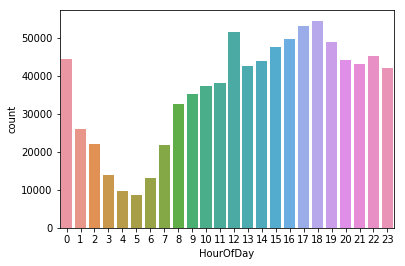

In [17]:
sns.countplot(df_train['HourOfDay'])

In [18]:
df_train['Month']=df_train['Month'].apply(lambda x : 'MonthLow' if x== 12 else ('MonthMed' if x in (2,6,7,8,9,11) else 'MonthHigh'))


df_train['HourofDay']=df_train['HourOfDay'].apply(lambda x : 'Morning' if (x >= 1) & (x <=7) else ('Day' if x > 7 & x <=18 else 'Evening'))

In [19]:
df_train.head()

,Category,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,HourOfDay,HourofDay
0,SEX OFFENSES FORCIBLE,Friday,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,2013,MonthMed,17,Day
1,LIQUOR LAWS,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,2004,MonthMed,2,Morning
2,FRAUD,Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2007,MonthMed,0,Evening
3,ROBBERY,Thursday,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,2007,MonthLow,18,Day
4,OTHER OFFENSES,Sunday,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,2012,MonthMed,17,Day


In [20]:
df_test['Month']=df_test['Month'].apply(lambda x : 'MonthLow' if x== 12 else ('MonthMed' if x in (2,6,7,8,9,11) else 'MonthHigh'))


df_test['HourofDay']=df_test['HourOfDay'].apply(lambda x : 'Morning' if (x >= 1) & (x <=7) else ('Day' if x > 7 & x <=18 else 'Evening'))

In [21]:
week_dict={
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
df_train['DayOfWeek']=df_train['DayOfWeek'].replace(week_dict)
df_test['DayOfWeek']=df_test['DayOfWeek'].replace(week_dict)

In [22]:
df_train.head()

,Category,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,HourOfDay,HourofDay
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,2013,MonthMed,17,Day
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,2004,MonthMed,2,Morning
2,FRAUD,3,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2007,MonthMed,0,Evening
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,2007,MonthLow,18,Day
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,2012,MonthMed,17,Day


In [23]:
df_train['Intersection']=df_train['Address'].apply(lambda x : 1 if '/' in x else 0)

df_train['Block']=df_train['Address'].apply(lambda x : 1 if 'Block' in x else 0)

df_train['StreetSuffix']=df_train['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

In [24]:
df_train.head()


,Category,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,HourOfDay,HourofDay,Intersection,Block,StreetSuffix
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,2013,MonthMed,17,Day,0,1,ST
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,2004,MonthMed,2,Morning,0,1,ST
2,FRAUD,3,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2007,MonthMed,0,Evening,0,1,ST
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,2007,MonthLow,18,Day,0,1,AV
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,2012,MonthMed,17,Day,1,0,ST


In [25]:
df_test['Intersection']=df_test['Address'].apply(lambda x : 1 if '/' in x else 0)

df_test['Block']=df_test['Address'].apply(lambda x : 1 if 'Block' in x else 0)

df_test['StreetSuffix']=df_test['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

In [26]:
df_train=df_train.drop(['Address'],axis=1)
df_test=df_test.drop(['Address'],axis=1)

In [27]:
df_train.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,Year,Month,HourOfDay,HourofDay,Intersection,Block,StreetSuffix
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,-122.419331,37.762264,2013,MonthMed,17,Day,0,1,ST
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",-122.411340,37.781271,2004,MonthMed,2,Morning,0,1,ST
2,FRAUD,3,SOUTHERN,NONE,-122.403405,37.775421,2007,MonthMed,0,Evening,0,1,ST
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,-122.404715,37.730161,2007,MonthLow,18,Day,0,1,AV
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",-122.405239,37.785265,2012,MonthMed,17,Day,1,0,ST


In [28]:
df_train['Y']=df_train['Y'].apply(lambda x : x if 37.82 > x else 37.82 )

df_train['X']=df_train['X'].apply(lambda x : x if -122.3 > x else -122.3 )

In [29]:
df_test['Y']=df_train['Y'].apply(lambda x : x if 37.82 > x else 37.82 )

df_test['X']=df_train['X'].apply(lambda x : x if -122.3 > x else -122.3 )

In [30]:
from sklearn.cluster import KMeans 

In [31]:
dataXY_train = df_train[['X','Y']]

dataXY_test = df_test[['X','Y']]

In [32]:
kmeans=KMeans(n_clusters=5)

kmeans.fit(dataXY_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
df_train['LocCluster']=kmeans.labels_

df_train = df_train.drop(['X','Y'], axis=1)

In [34]:
df_train.head()

,Category,DayOfWeek,PdDistrict,Resolution,Year,Month,HourOfDay,HourofDay,Intersection,Block,StreetSuffix,LocCluster
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,2013,MonthMed,17,Day,0,1,ST,0
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",2004,MonthMed,2,Morning,0,1,ST,3
2,FRAUD,3,SOUTHERN,NONE,2007,MonthMed,0,Evening,0,1,ST,3
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2007,MonthLow,18,Day,0,1,AV,1
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",2012,MonthMed,17,Day,1,0,ST,3


In [36]:
kmeans=KMeans(n_clusters=5)

kmeans.fit(dataXY_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
df_test['LocCluster']=kmeans.labels_

df_test = df_test.drop(['X','Y'], axis=1)

In [38]:
df_train.drop(columns = 'Resolution',axis = 1, inplace = True)
Y = df_train['Category']

df_train.drop(columns = 'Category', axis = 1, inplace = True)
df_test.drop(columns = 'Resolution',axis = 1, inplace = True)

In [39]:
df_train = pd.get_dummies(df_train)

In [40]:
df_test = pd.get_dummies(df_test)

In [41]:
df_train=pd.get_dummies(df_train,prefix=['Intersection' , 'Block', 'LocCluster' ],columns=['Intersection' , 'Block', 'LocCluster' ])

df_test=pd.get_dummies(df_test,prefix=['Intersection' , 'Block', 'LocCluster' ],columns=['Intersection' , 'Block', 'LocCluster' ])

In [42]:
df_train.head()

,DayOfWeek,Year,HourOfDay,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,...,StreetSuffix_WY,Intersection_0,Intersection_1,Block_0,Block_1,LocCluster_0,LocCluster_1,LocCluster_2,LocCluster_3,LocCluster_4
0,5,2013,17,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,4,2004,2,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3,2007,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,4,2007,18,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,7,2012,17,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
df_train=pd.get_dummies(df_train,prefix=['DayOfWeek'],columns=['DayOfWeek'])

df_test=pd.get_dummies(df_test,prefix=['DayOfWeek'],columns=['DayOfWeek'])

In [44]:
df_train.head()

,Year,HourOfDay,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,...,LocCluster_2,LocCluster_3,LocCluster_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,2013,17,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2004,2,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,2007,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,2007,18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2012,17,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [45]:
#MODELLING




In [326]:
#X_train = df_train

In [327]:
#X_test = df_test

In [328]:
#print(X_train.shape)
#print(X_test.shape)

In [329]:

#col = X_train.columns
#col2 = X_test.columns


#print(col2[20:40])

In [330]:
#YAHI PE HAI CHUDAP!

#col[20:40]

In [331]:
#X_test.insert(loc=25,column='StreetSuffix_EX',value = 0)

In [332]:
#X_test.insert(loc=31,column='StreetSuffix_RW',value = 0)

In [333]:
#X_test.insert(loc=34,column='StreetSuffix_WK',value = 0)

In [334]:
#print(X_train.shape)
#print(X_test.shape)



In [335]:
#LOGISTIC REGRESSION

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df_train

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size=0.33 , random_state=25)

In [50]:
X_train.shape

(581474, 52)

In [55]:
Y

0         SEX OFFENSES FORCIBLE
1                   LIQUOR LAWS
2                         FRAUD
3                       ROBBERY
4                OTHER OFFENSES
5                      WARRANTS
6                      BURGLARY
7                SUSPICIOUS OCC
8                OTHER OFFENSES
9                 DRUG/NARCOTIC
10                LARCENY/THEFT
11               OTHER OFFENSES
12                    VANDALISM
13                      ASSAULT
14                DRUG/NARCOTIC
15                LARCENY/THEFT
16                DRUG/NARCOTIC
17                VEHICLE THEFT
18               MISSING PERSON
19               OTHER OFFENSES
20                 NON-CRIMINAL
21                      ASSAULT
22                  DRUNKENNESS
23                 NON-CRIMINAL
24               OTHER OFFENSES
25                     WARRANTS
26                LARCENY/THEFT
27                      ROBBERY
28                VEHICLE THEFT
29                LARCENY/THEFT
                  ...          
867843  

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [365]:
lr = lr.fit(X,Y)

In [380]:
y_pred=lr.predict(X)

In [381]:
y_pred.shape

(867873,)

In [382]:
Y_train

array(['NON-CRIMINAL', 'MISSING PERSON', 'OTHER OFFENSES', ...,
       'OTHER OFFENSES', 'LARCENY/THEFT', 'LARCENY/THEFT'], dtype=object)

In [378]:
from sklearn.metrics import accuracy_score

In [383]:
accuracy_score(Y,y_pred)

0.2310948721759981

In [ ]:
cat=pd.DataFrame(Y_train.unique()).sort_values(by=[0]).reset_index().drop(['index'],axis=1)[0].to_dict()


In [ ]:
df = pd.read_csv("test.csv")
#Idtest = df['Id']
df.head()


#submit = pd.DataFrame({'Id' : Idtest})

In [ ]:
for key,value in cat.items():
        submit[value]=0

In [ ]:
submit.head()

In [ ]:
for item in y_pred:
    for key,value in cat.items():
        if (item==value):
            submit[value][key]=1

In [ ]:
submit

In [ ]:
submit.to_csv("dipta_lr1.csv",index=False)

In [ ]:
submit[submit['Id']== 47900]